In [1]:
from utils import plot_decision_boundary, poly_linear_regression, CM_BRIGHT

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [37]:
import sklearn
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
sklearn.__version__

'1.6.1'

Division del dataset, solo lo dividimos pero añadimos  !!! estratificacion para evitar balanceos 

1Incluimos escalado o no ????. NO !!! no se hace hasta que no se hayan realizado las transformaciones , en concreto : se pueden hacer las transformaciones y cambios necesarios , se ejecuta el analisis de correlacion , despues se pueden eliminar las variables redundantes o las que consideremos que generan overfitting . HACER EL ESCALADO . Posteriormente aplicar regularizacion y el modelo .

En caso de aplicacion de LM como arbol Randon Forest o Arbol 


In [38]:
# Dividimos los datos en entrenamiento y test (80 training, 20 test)
#asegurarse de que no analizamos ni vemos el test set
#hacer las pequeñas modificaciones necsesarias por ser un CSV

with open("./airbnb-listings-extract.csv", "r", encoding="utf-8") as f:
    for i in range(5):
        print(f.readline())


import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Cargar el dataset con separador adecuado y motor más flexible
file_path = "./airbnb-listings-extract.csv"
full_df = pd.read_csv(
    file_path,
    sep=';',
    quotechar='"',
    engine='python'
)

# 2. División en train/test (sin estratificación aún)
train, test = train_test_split(full_df, test_size=0.3, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')


# 3. Guardar los subconjuntos como CSV (usando también separador ;)
train.to_csv('./airbnb-train.csv', sep=';', decimal='.', index=False)
test.to_csv('./airbnb-test.csv', sep=';', decimal='.', index=False)

# 4. Trabajar con el dataset de entrenamiento
bronze_data = pd.read_csv('./airbnb-train.csv', sep=';', quotechar='"', engine='python', decimal='.')
print(bronze_data.head(5).T)

''' 
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Cargar el dataset desde archivo TSV
file_path = "./airbnb-listings-extract.csv"  # Ruta relativa
full_df = pd.read_csv(file_path, sep='\t')  # ← CLAVE: tabulador

# 2. Dividir en subconjuntos de entrenamiento y test (70%-30%)
train, test = train_test_split(full_df, test_size=0.3, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# 3. Guardar los subconjuntos como CSV con tabulador como separador
train.to_csv('./airbnb-train.csv', sep='\t', decimal='.', index=False)
test.to_csv('./airbnb-test.csv', sep='\t', decimal='.', index=False)

# 4. A partir de aquí, trabajamos solo con el conjunto de entrenamiento
bronze_data = pd.read_csv('./airbnb-train.csv', sep='\t', decimal='.')
print(bronce_data.head(5).T)''' 


''' import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Cargar el dataset desde la misma carpeta donde está tu archivo .py
file_path = "./airbnb-listings-extract.csv"  # ← ruta relativa
full_df = pd.read_csv(file_path)

# 2. Dividir en subconjuntos de entrenamiento y test (70%-30%)
train, test = train_test_split(full_df, test_size=0.3, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')

# 3. Guardar los subconjuntos como CSV con el formato adecuado
train.to_csv('./airbnb-train.csv', sep=';', decimal='.', index=False)
test.to_csv('./airbnb-test.csv', sep=';', decimal='.', index=False)

# 4. A partir de aquí, trabajamos solo con el conjunto de entrenamiento
bronze_data = pd.read_csv('./airbnb-train.csv', sep=';', decimal='.')
print(bronze_data.head(5).T)

#No estratificamos en un primer momento por que hay que definir la variable objetivo'''



'''
from sklearn.model_selection import train_test_split

full_df = pd.read_csv("./data/king_county.csv")
train, test = train_test_split(full_df, test_size=0.3, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')

# Guardamos con modificaciones el dataset de train y tes por ser un csv
train.to_csv('./data/king_county_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/king_county_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

house_data = pd.read_csv('./data/king_county_train.csv', sep=';', decimal='.')
house_data.head(5).T

scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
'''

ID;Listing Url;Scrape ID;Last Scraped;Name;Summary;Space;Description;Experiences Offered;Neighborhood Overview;Notes;Transit;Access;Interaction;House Rules;Thumbnail Url;Medium Url;Picture Url;XL Picture Url;Host ID;Host URL;Host Name;Host Since;Host Location;Host About;Host Response Time;Host Response Rate;Host Acceptance Rate;Host Thumbnail Url;Host Picture Url;Host Neighbourhood;Host Listings Count;Host Total Listings Count;Host Verifications;Street;Neighbourhood;Neighbourhood Cleansed;Neighbourhood Group Cleansed;City;State;Zipcode;Market;Smart Location;Country Code;Country;Latitude;Longitude;Property Type;Room Type;Accommodates;Bathrooms;Bedrooms;Beds;Bed Type;Amenities;Square Feet;Price;Weekly Price;Monthly Price;Security Deposit;Cleaning Fee;Guests Included;Extra People;Minimum Nights;Maximum Nights;Calendar Updated;Has Availability;Availability 30;Availability 60;Availability 90;Availability 365;Calendar last Scraped;Number of Reviews;First Review;Last Review;Review Scores Rati

'\nfrom sklearn.model_selection import train_test_split\n\nfull_df = pd.read_csv("./data/king_county.csv")\ntrain, test = train_test_split(full_df, test_size=0.3, shuffle=True, random_state=0)\n\nprint(f\'Dimensiones del dataset de training: {train.shape}\')\n\n# Guardamos con modificaciones el dataset de train y tes por ser un csv\ntrain.to_csv(\'./data/king_county_train.csv\', sep=\';\', decimal=\'.\', index=False)\ntest.to_csv(\'./data/king_county_test.csv\', sep=\';\', decimal=\'.\', index=False)\n\n# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. \n\nhouse_data = pd.read_csv(\'./data/king_county_train.csv\', sep=\';\', decimal=\'.\')\nhouse_data.head(5).T\n\nscaler = preprocessing.StandardScaler().fit(X_train)\nXtrainScaled = scaler.transform(X_train)\n'

Exploramos el Dataset para analizar su composicion, valorar el problema comsiderar y para ser definida posteriormente, esto definira nuestra ruta posterior en la fase de preprocesamiento del dato, en la que realizaremos transformaciones ... . Estamos asumiendo posibles problemas por no estratificar , estos serian mas graves en caso de que fuese un problema de clasifiacion o regresion logistica , tambien en caso de empleo de Modelos como KNNo SVMy por tanto realizar una estratificacion para evitar posibles problemas por balanceo en la aplicacion de Modelos de ML como KNN, SVM o Kernel .

In [39]:
bronze_data.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

In [40]:
print(bronze_data.dtypes.to_string())



ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

In [41]:
#Hacemos impresion por tipo de datos
object_cols = bronze_data.select_dtypes(include='object').columns.tolist()
print("Columnas tipo object (texto):", object_cols)
numeric_cols = bronze_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Columnas numéricas:", numeric_cols)
date_cols = bronze_data.select_dtypes(include='datetime64[ns]').columns.tolist()
print("Columnas tipo fecha:", date_cols)


Columnas tipo object (texto): ['Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Jurisdiction Names', 'Cancellation Policy', 'Geolocation', 'Features']
Columnas numéricas: ['ID', 'Scrape ID', 'Host ID', 'Host Response Rate', 'Host Listings Count', 'Host Total Listings Co

Valoramos los valores nulos de las columnas del dataset 

In [42]:
# 1. Contar valores nulos por columna
nulls = bronze_data.isnull().sum()

# 2. Filtrar solo columnas con al menos un nulo
nulls = nulls[nulls > 0].sort_values(ascending=False)

# 3. Obtener tipos de datos
dtypes = bronze_data.dtypes[nulls.index]

# 4. Crear DataFrame con toda la información
nulls_df = pd.DataFrame({
    'Tipo de dato': dtypes,
    'Valores Nulos': nulls,
    '% del total': (nulls / len(bronze_data) * 100).round(2)
})

print("📋 Columnas con valores nulos y sus tipos de datos:")
print(nulls_df)


📋 Columnas con valores nulos y sus tipos de datos:
                               Tipo de dato  Valores Nulos  % del total
Has Availability                     object          10339        99.93
Host Acceptance Rate                 object          10321        99.76
Jurisdiction Names                   object          10203        98.62
License                              object          10095        97.57
Square Feet                         float64           9936        96.04
Monthly Price                       float64           7844        75.82
Weekly Price                        float64           7833        75.71
Notes                                object           6386        61.72
Security Deposit                    float64           5899        57.02
Interaction                          object           4599        44.45
Access                               object           4532        43.80
Cleaning Fee                        float64           4222        40.81
Transit      

Analisis de valores para conocer a que mercado se pueden referir mas los valores 

In [44]:
# Evaluar valores únicos y su porcentaje en la columna 'country'
country_counts = bronze_data['Country'].value_counts(dropna=False)
country_percent = (country_counts / len(bronze_data) * 100).round(2)

# Unir ambos en un DataFrame
country_df = pd.DataFrame({
    'Frecuencia': country_counts,
    'Porcentaje (%)': country_percent
})

print("📊 Distribución de valores en la columna 'country':")
print(country_df)

📊 Distribución de valores en la columna 'country':
                Frecuencia  Porcentaje (%)
Country                                   
Spain                 9817           94.89
United Kingdom         118            1.14
United States          115            1.11
France                  72            0.70
Italy                   51            0.49
Australia               33            0.32
Germany                 30            0.29
Ireland                 23            0.22
Austria                 22            0.21
Netherlands             16            0.15
Belgium                 14            0.14
Canada                  14            0.14
Denmark                 10            0.10
Switzerland              4            0.04
Greece                   3            0.03
Hong Kong                2            0.02
NaN                      1            0.01
Cuba                     1            0.01


evaluacion de valores de ciudad 

In [45]:
# Evaluar valores únicos y su porcentaje en la columna 'City'
city_counts = bronze_data['City'].value_counts(dropna=False)
city_percent = (city_counts / len(bronze_data) * 100).round(2)

# Unir ambos en un DataFrame
city_df = pd.DataFrame({
    'Frecuencia': city_counts,
    'Porcentaje (%)': city_percent
})

print("📊 Distribución de valores en la columna 'City':")
print(city_df)

📊 Distribución de valores en la columna 'City':
                                     Frecuencia  Porcentaje (%)
City                                                           
Madrid                                     9249           89.40
Barcelona                                   211            2.04
London                                       99            0.96
Paris                                        70            0.68
马德里                                          42            0.41
...                                         ...             ...
Puerto Pollensa (Palma de Mallorca)           1            0.01
El Toro                                       1            0.01
Salerno                                       1            0.01
Costitx                                       1            0.01
Aravaca (Madrid)                              1            0.01

[210 rows x 2 columns]


Una vez visto el Dataset, optamos inicialmente por plantear un problema de regresion lineal. Siguiendo la recomendacion de hacer un progresion en la complicacion de la practica, inicialmente realizaremos una simplificacion del dataset . A la vista del dataset, considerando que la mayoria de los valores corresponden a Pais España, vamos a considerar solo la informacion correspondiente a este pais para generar un modelo con la mayoria de los datos y desechando aquellos que no aporten al modelo.Posteriormente, realizaremos una seleccion de variables de tipo numerico dejando sin emplear las de tipo texto.
1 Hemos detectado valores null en la columna de Price, por lo que quitaremos estos datos del data set.
2 Tambien vamos aplicar fillna para calcular los valores de los campos nulos en las columnas , Bathrooms, Beds y  Bedrooms .Mejor que un KNNImputer por que tendriamos que escalar y requiere entrenamiento 
3 Quitaremos las columnas categoricas : 'Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Jurisdiction Names', 'Cancellation Policy', 'Geolocation', 'Features'
4 Quitaremos las siguientes columnas de tipo INT o FLOAT que tienen bastantes valores null o que creemos que no aportan al modelo 'Scrape ID', 'Host ID', 'Host Response Rate', 'Host Listings Count', 'Host Total Listings Count',
'Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee',
'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness',
'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location',
'Review Scores Value', 'Calculated host listings count', 'Reviews per Month'
5 Nos quedamos con los valores que tengan como Country Spain y City 

Posteriormente realizaremos otras transformaciones  para Host Since transformandola en dias que lleva alquilandose, tambien haciendo esa transformacion con Calendar Updated   y aplicando a esta variable categorica Cancellation Policy un labelencoder .Tambien podriamos emplear KNNImputer para los N/A y asi evitar sesgo, aun asi el sesgo no deberia de ser muy elevado con el FILLNA al ser pocos valores .

Quitamos los registros Null de Price

In [46]:
# Paso 1: Eliminar registros donde la variable objetivo 'price' sea nula
bronze_data = bronze_data[bronze_data['Price'].notnull()].copy()

# Validación
print(f"📉 Registros restantes tras eliminar nulos en 'price': {bronze_data.shape[0]}")
print(f"🧪 Nulos restantes en 'price': {bronze_data['Price'].isnull().sum()}")


📉 Registros restantes tras eliminar nulos en 'price': 10332
🧪 Nulos restantes en 'price': 0


Desechamos columnas que no sean validas para evaluar el problema que planteamos categoricas

In [47]:
# Paso 2: Eliminar columnas categóricas irrelevantes
categorical_columns_to_drop = [
    'Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description',
    'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access',
    'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url',
    'XL Picture Url', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
    'Host About', 'Host Response Time', 'Host Acceptance Rate', 'Host Thumbnail Url',
    'Host Picture Url', 'Host Neighbourhood', 'Host Verifications', 'Street',
    'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',
     'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
    'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Calendar Updated',
    'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review',
    'License', 'Jurisdiction Names', 'Cancellation Policy', 'Geolocation', 'Features'
]

bronze_data.drop(columns=categorical_columns_to_drop, inplace=True, errors='ignore')

# Validación
print(f"📉 Columnas restantes tras eliminar categóricas irrelevantes: {bronze_data.shape[1]}")


📉 Columnas restantes tras eliminar categóricas irrelevantes: 38


Desechamos columnas que no sean validas para evaluar el problema siendo INT o FLOAT

In [48]:
# Paso 4: Eliminar columnas numéricas con muchos nulos o poco valor predictivo
numeric_columns_to_drop = [
    'Scrape ID', 'Host ID', 'Host Response Rate', 'Host Listings Count', 'Host Total Listings Count',
    'Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee',
    'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness',
    'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location',
    'Review Scores Value', 'Calculated host listings count', 'Reviews per Month'
]

bronze_data.drop(columns=numeric_columns_to_drop, inplace=True, errors='ignore')

# Validación
print(f"🧹 Columnas restantes después de eliminar numéricas innecesarias: {bronze_data.shape[1]}")


🧹 Columnas restantes después de eliminar numéricas innecesarias: 19


In [ ]:
aplicamos FILLNA para rellenar los nulos 

In [50]:
# Paso 5: Imputar columnas numéricas clave con la mediana
for col in ['Bathrooms', 'Bedrooms', 'Beds']:
    if col in bronze_data.columns:
        median_value = bronze_data[col].median()
        bronze_data[col] = bronze_data[col].fillna(median_value)
        print(f"✔️ Imputados valores nulos en '{col}' con mediana = {median_value}")


✔️ Imputados valores nulos en 'Bathrooms' con mediana = 1.0
✔️ Imputados valores nulos en 'Bedrooms' con mediana = 1.0
✔️ Imputados valores nulos en 'Beds' con mediana = 2.0


Filtrar por pais España y ciudad Madrid

In [51]:
# Paso 6: Filtrar propiedades en España y en la ciudad de Madrid
filtro_geografico = (bronze_data['Country'] == 'Spain') & (bronze_data['City'] == 'Madrid')
bronze_data = bronze_data[filtro_geografico].copy()

# Validación
print(f"🏠 Registros tras filtrar por Country = Spain y City = Madrid: {bronze_data.shape[0]}")


🏠 Registros tras filtrar por Country = Spain y City = Madrid: 9241


In [52]:
# 1. Eliminar columnas 'City' y 'Country'
bronze_data.drop(columns=['City', 'Country'], inplace=True, errors='ignore')

# 2. Calcular nulos restantes
nulls = bronze_data.isnull().sum()
nulls = nulls[nulls > 0].sort_values(ascending=False)
dtypes = bronze_data.dtypes[nulls.index]

# 3. Crear resumen de columnas con nulos
nulls_df = pd.DataFrame({
    'Tipo de dato': dtypes,
    'Valores Nulos': nulls,
    '% del total': (nulls / len(bronze_data) * 100).round(2)
})

# 4. Mostrar resultados
print("📋 Columnas con valores nulos restantes:")
print(nulls_df)


📋 Columnas con valores nulos restantes:
Empty DataFrame
Columns: [Tipo de dato, Valores Nulos, % del total]
Index: []


In [53]:
# Mostrar todas las columnas con su tipo de dato
columnas_dtypes = bronze_data.dtypes.reset_index()
columnas_dtypes.columns = ['Nombre de columna', 'Tipo de dato']

print("📋 Columnas y tipos de datos en bronze_data:")
print(columnas_dtypes)


📋 Columnas y tipos de datos en bronze_data:
    Nombre de columna Tipo de dato
0                  ID        int64
1            Latitude      float64
2           Longitude      float64
3        Accommodates        int64
4           Bathrooms      float64
5            Bedrooms      float64
6                Beds      float64
7               Price      float64
8     Guests Included        int64
9        Extra People        int64
10     Minimum Nights        int64
11     Maximum Nights        int64
12    Availability 30        int64
13    Availability 60        int64
14    Availability 90        int64
15   Availability 365        int64
16  Number of Reviews        int64


Creacion de un dataset para el sklearn ?? es necesario viniendo del CSV tras la division ? todavia no , mas adelante 

DE QUE CLASE DE PROBLEMA SE TRATA ? REGRESSION LINEAL O REGRESION LOGISTICA (CLASIFICACION)

Modelo de regresion lineal : precio , 
Modelo de regresion logistica o de clasificacion : 

EXPLORACION & TRANSFORMACIONES 
Multiples transformaciones pequeñas ..... eliminacion de los outliners 

Analisis individual de las variables mediante bkloxplot y asociandolas a precio tambien 

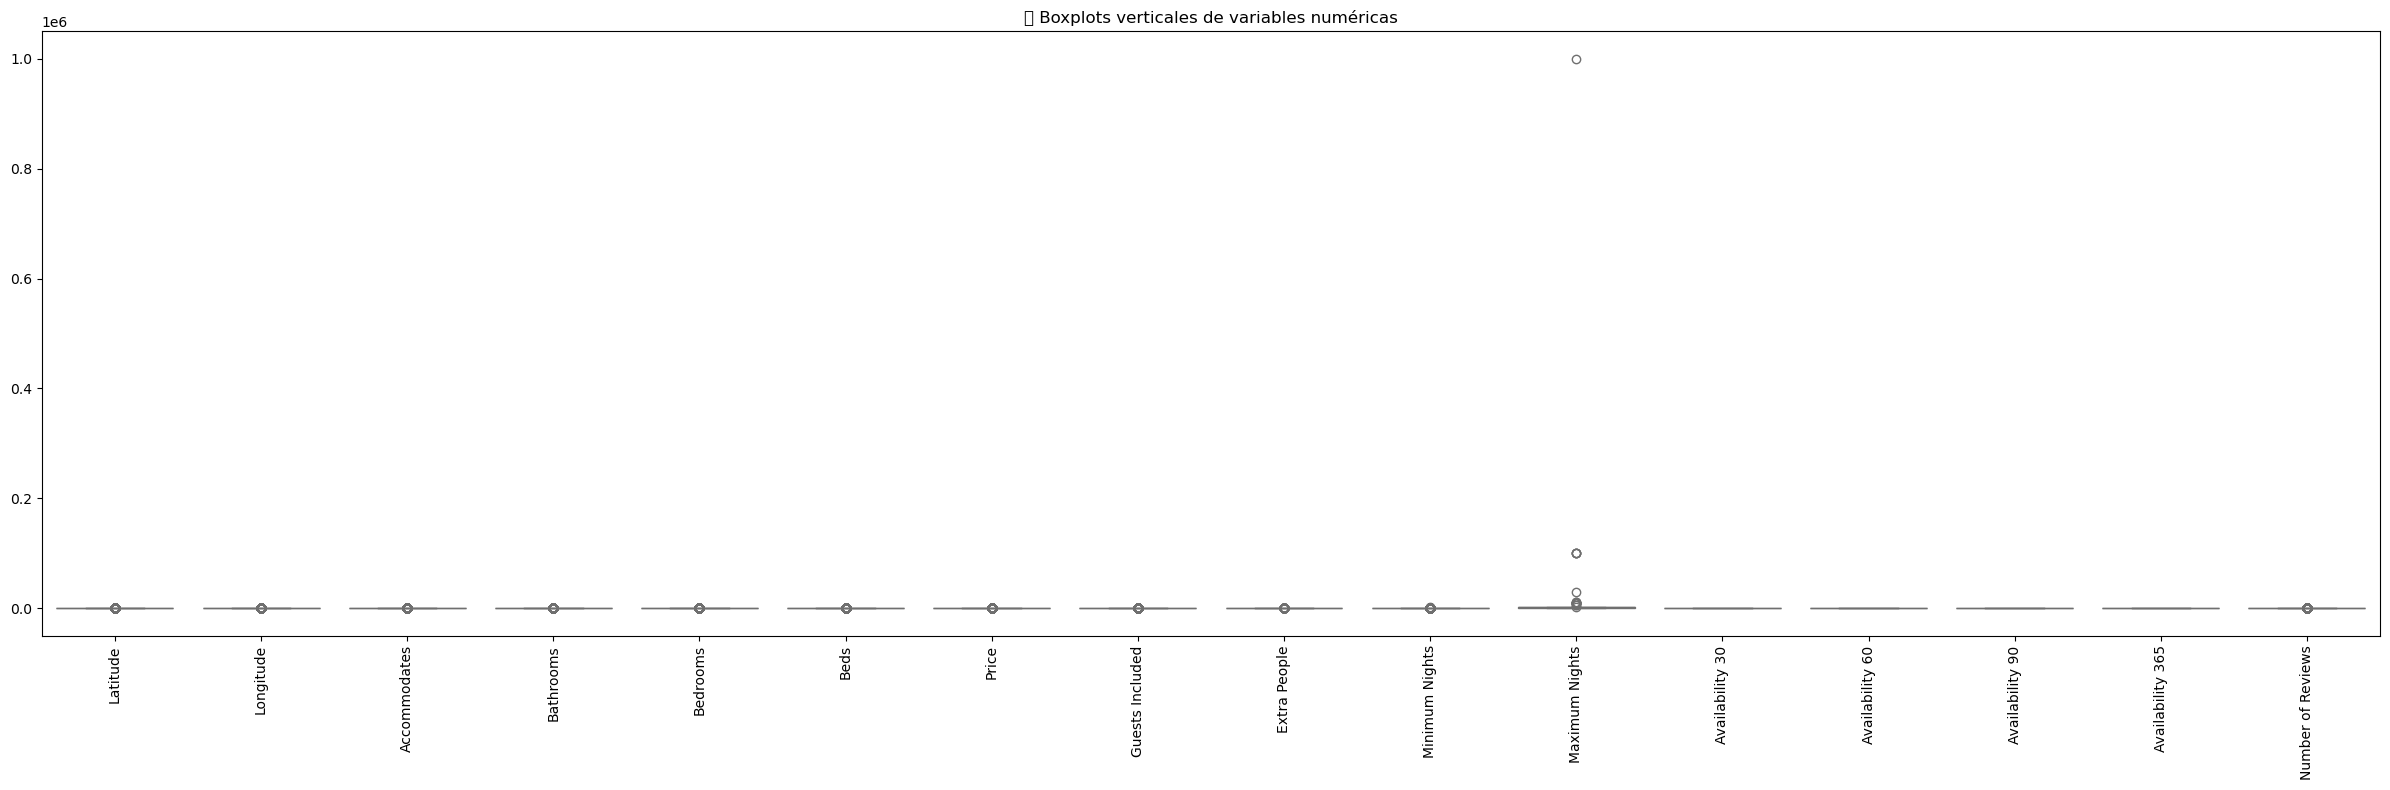

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas numéricas (excluyendo ID)
cols_to_plot = [
    'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
    'Price', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
    'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365',
    'Number of Reviews'
]

# Configuración general
plt.figure(figsize=(len(cols_to_plot) * 1.5, 8))

# Crear un boxplot para todas las variables en un mismo gráfico
sns.boxplot(data=bronze_data[cols_to_plot], orient='v', palette='pastel')
plt.xticks(rotation=90)
plt.title("📦 Boxplots verticales de variables numéricas")
plt.tight_layout()
plt.show()


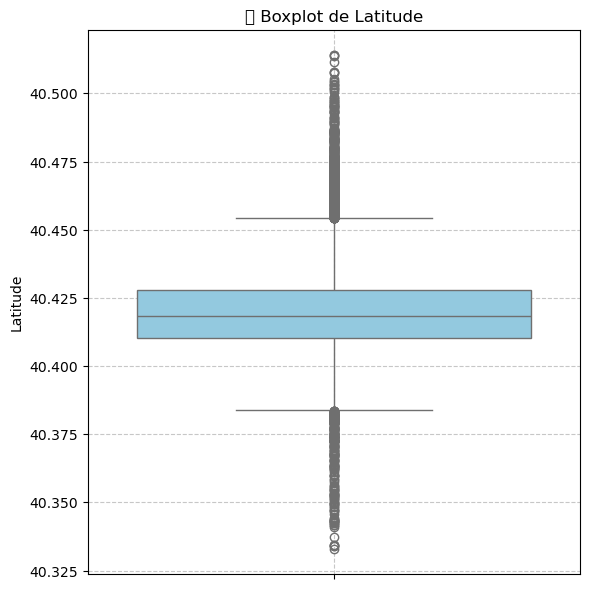

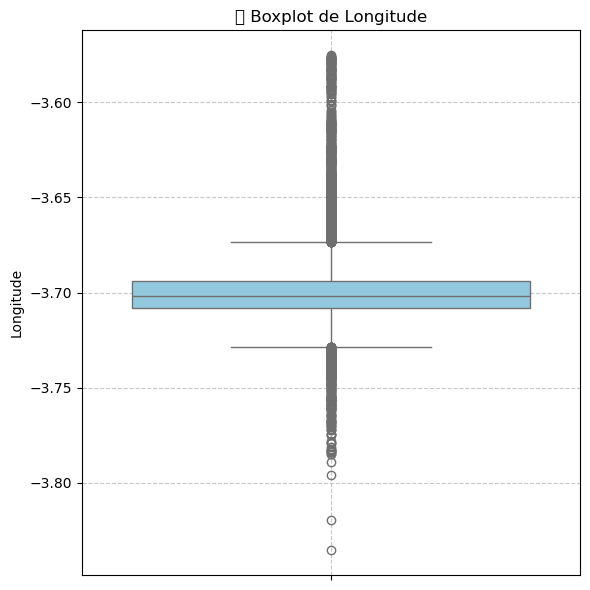

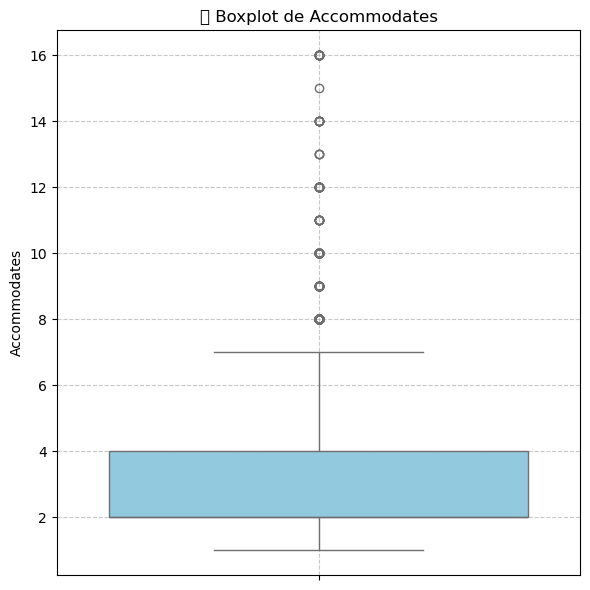

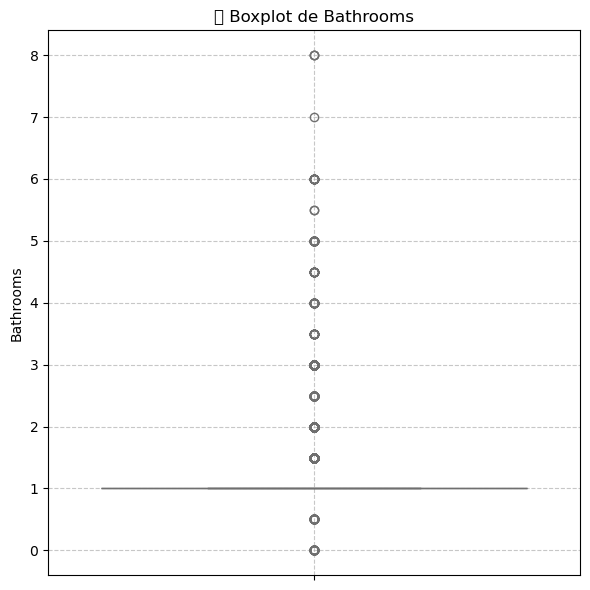

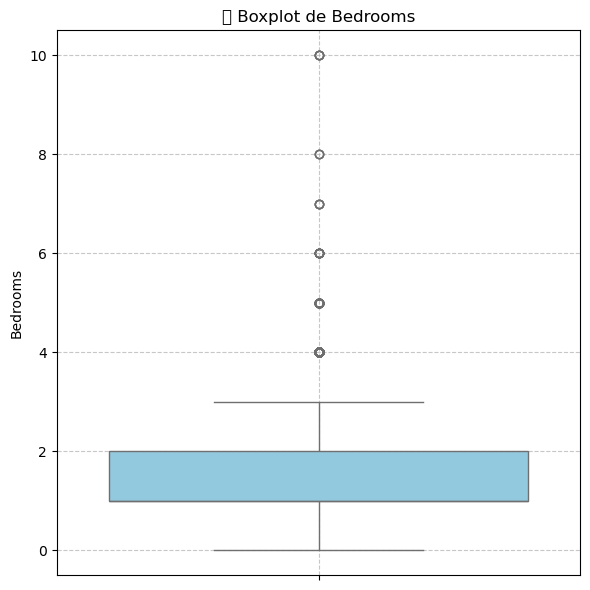

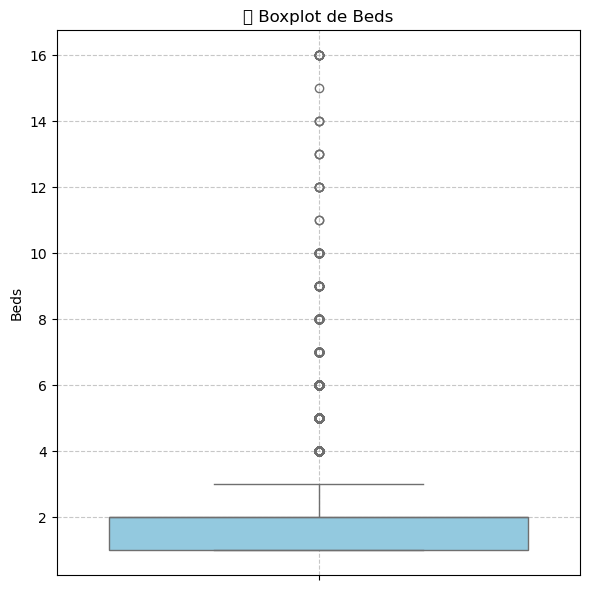

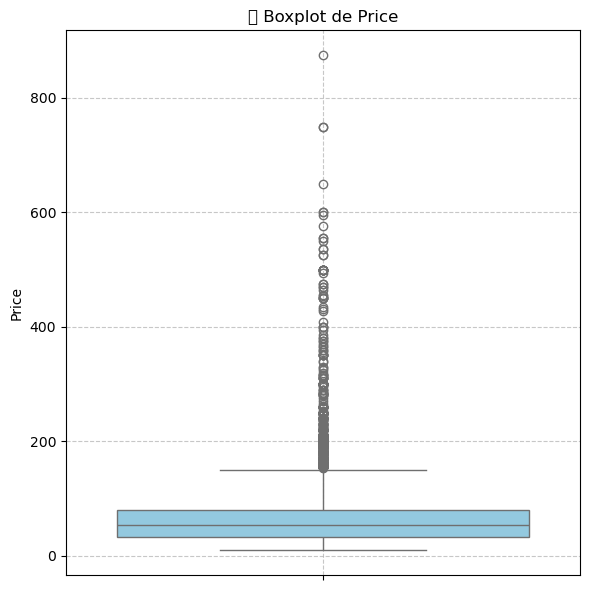

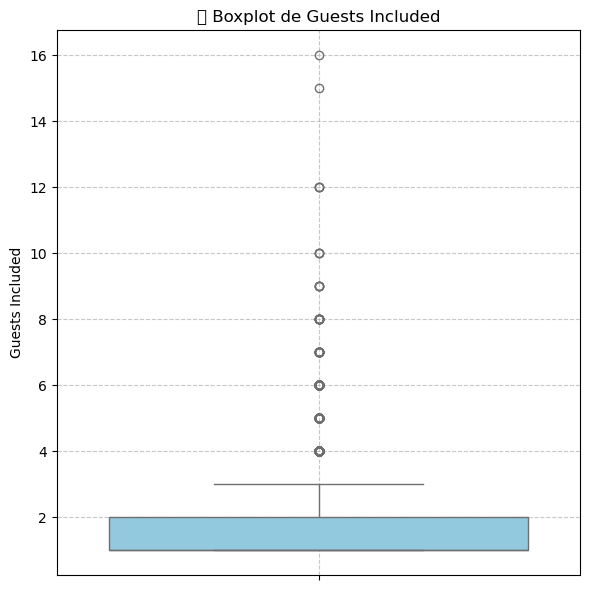

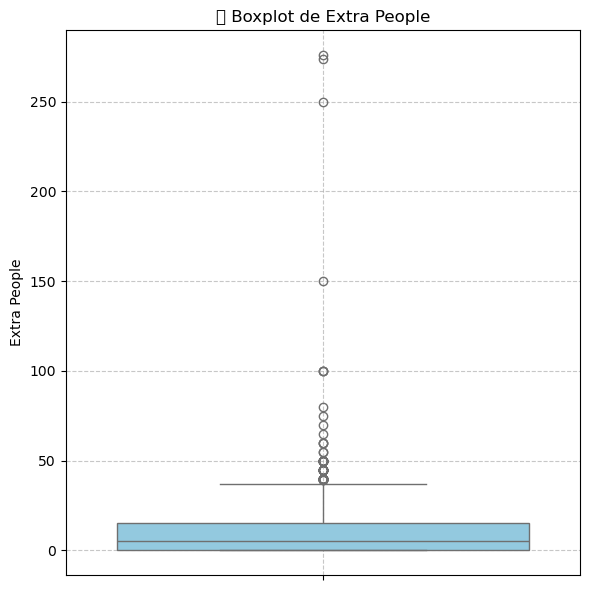

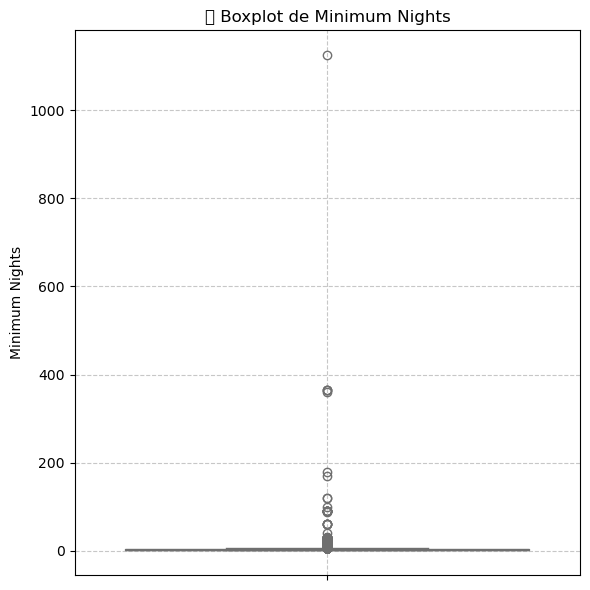

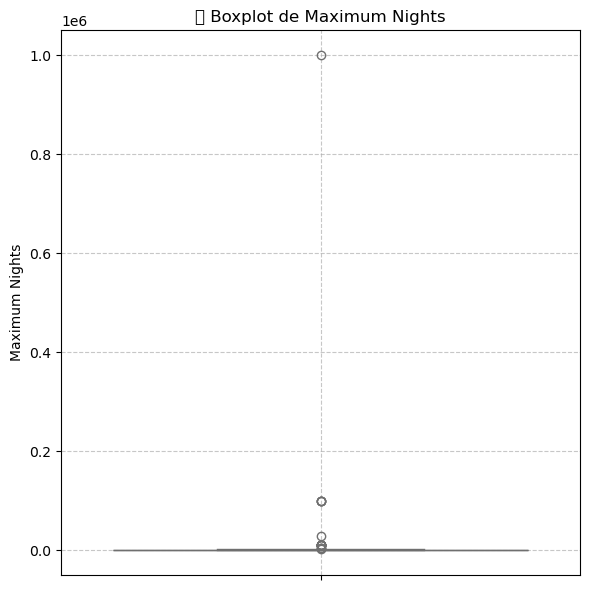

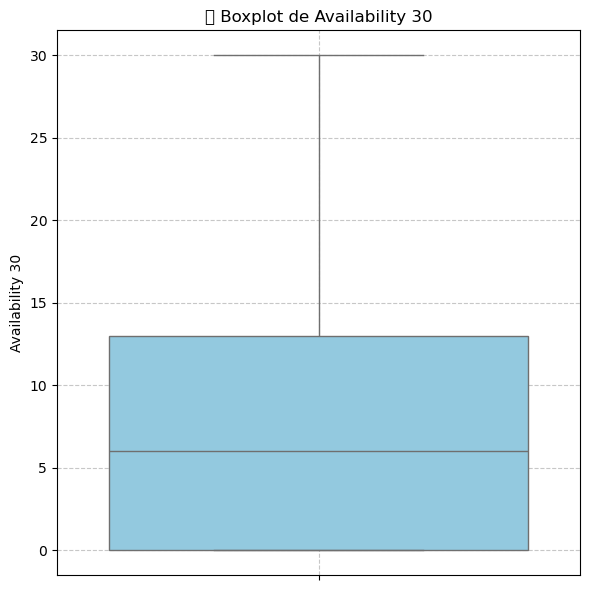

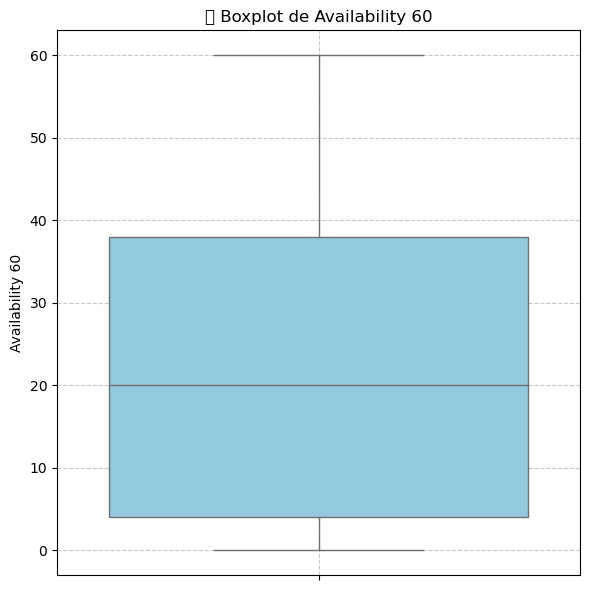

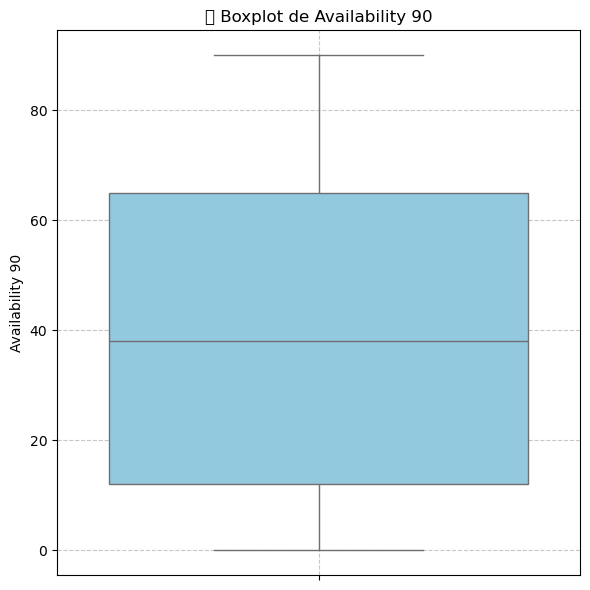

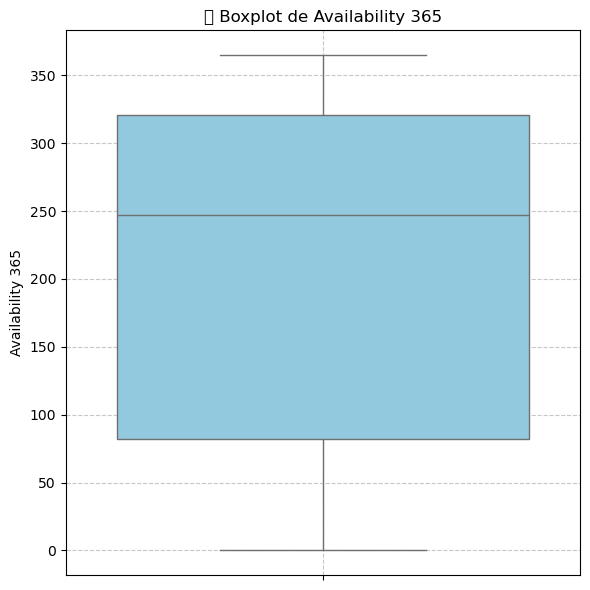

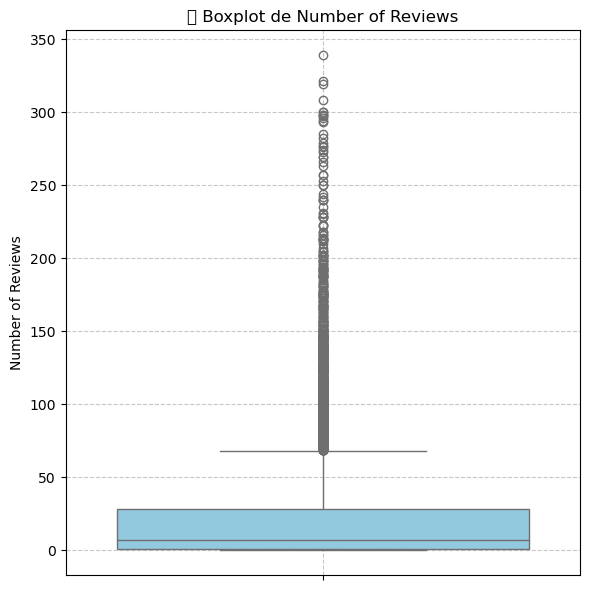

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas numéricas (exceptuando ID)
cols_to_plot = [
    'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
    'Price', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
    'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365',
    'Number of Reviews'
]

# Crear una figura por variable
for col in cols_to_plot:
    plt.figure(figsize=(6, 6))
    sns.boxplot(y=bronze_data[col], color='skyblue')
    plt.title(f'📦 Boxplot de {col}', fontsize=12)
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Analisis exploratorio de cada variable con la variable Price 

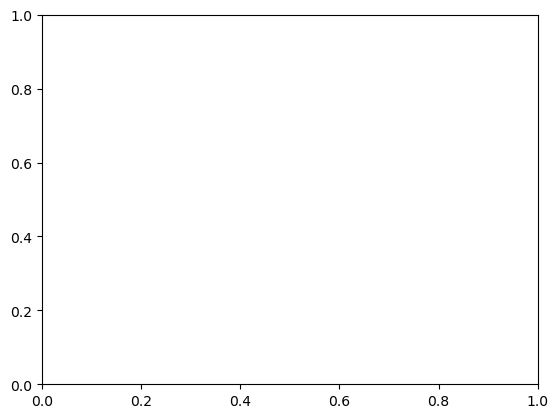

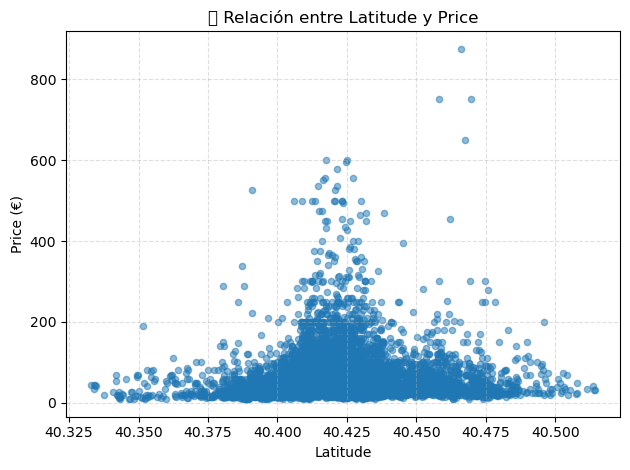

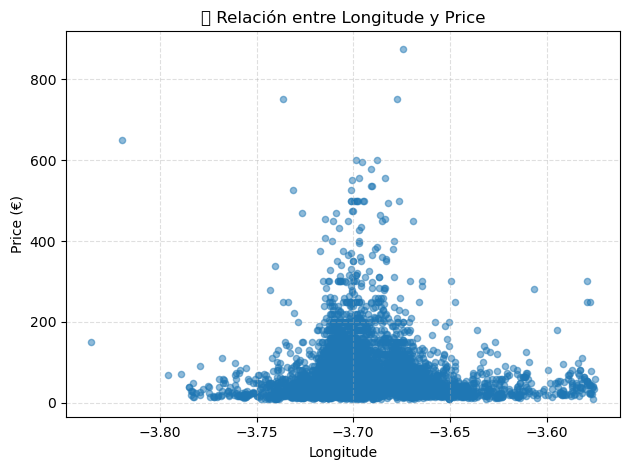

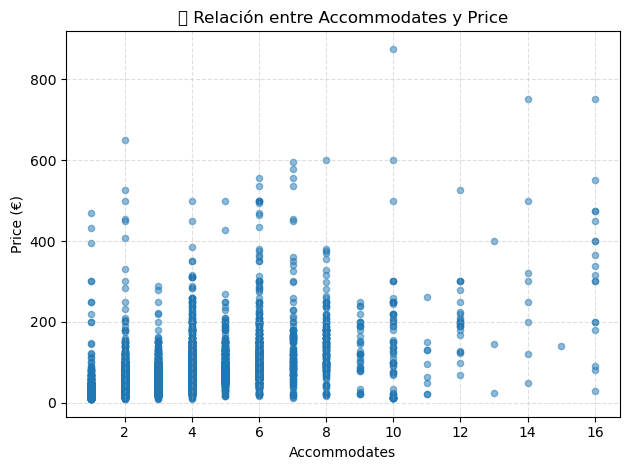

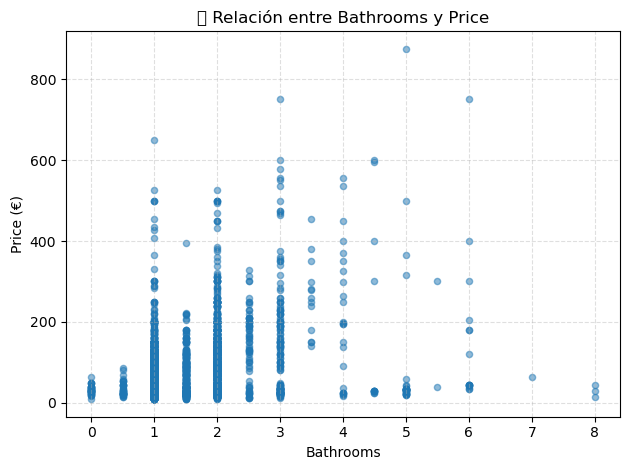

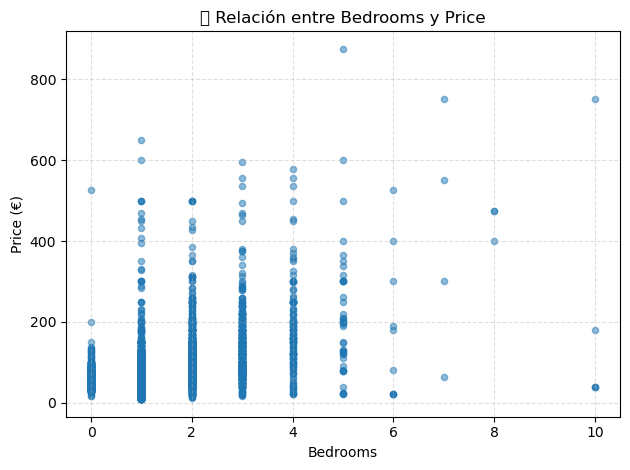

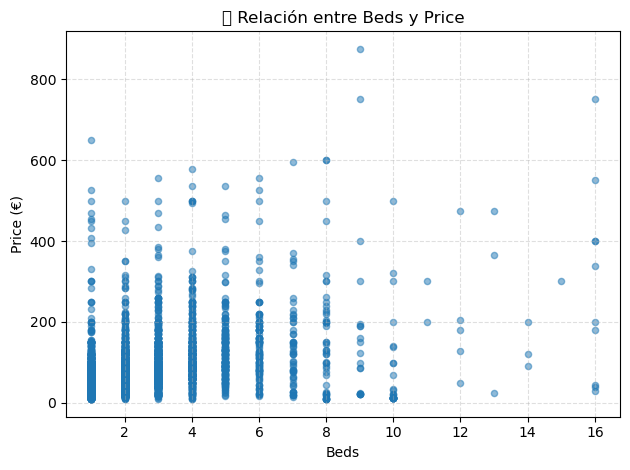

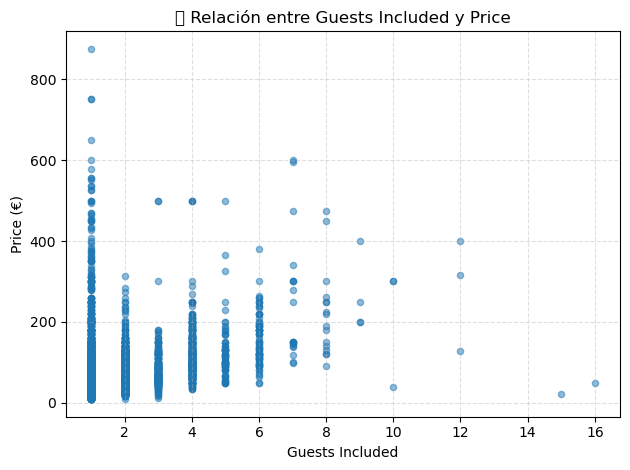

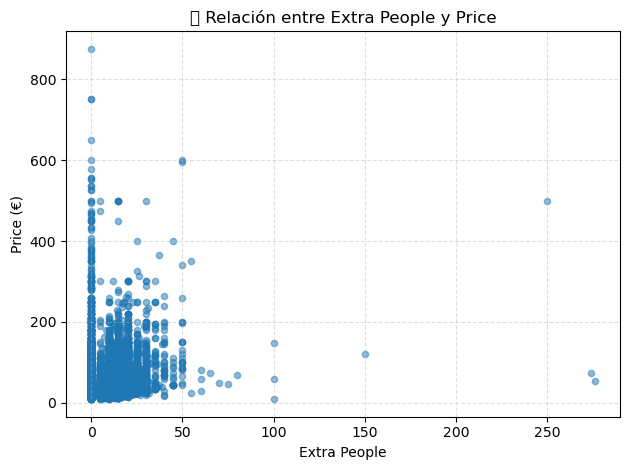

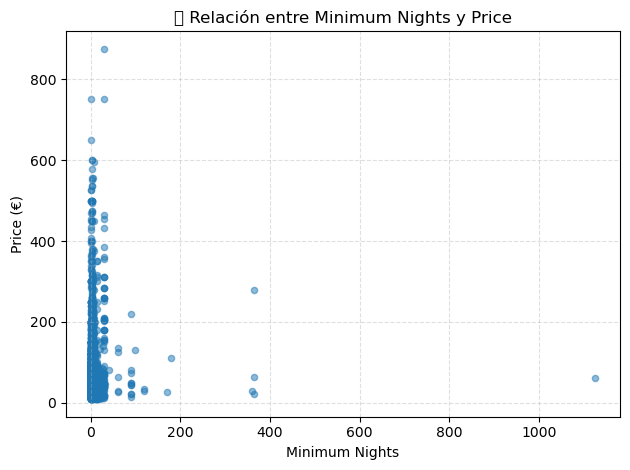

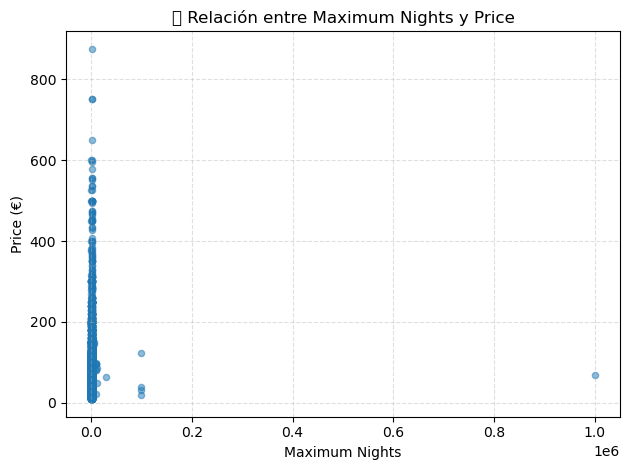

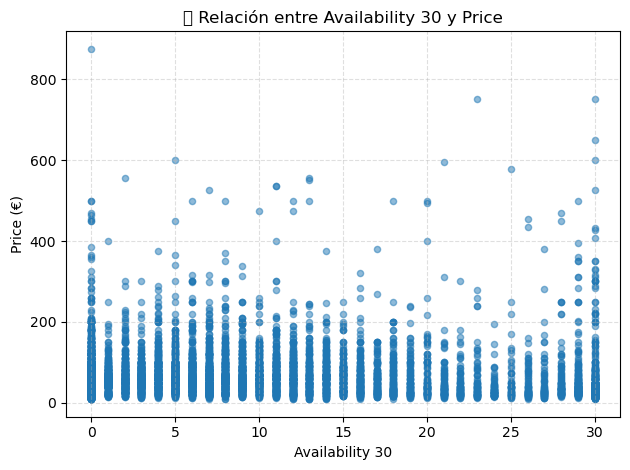

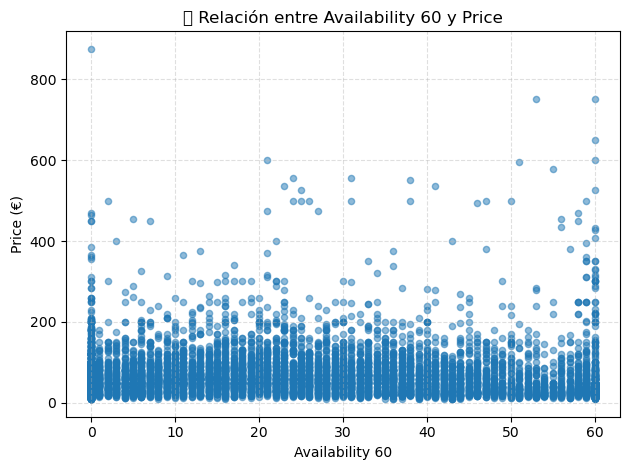

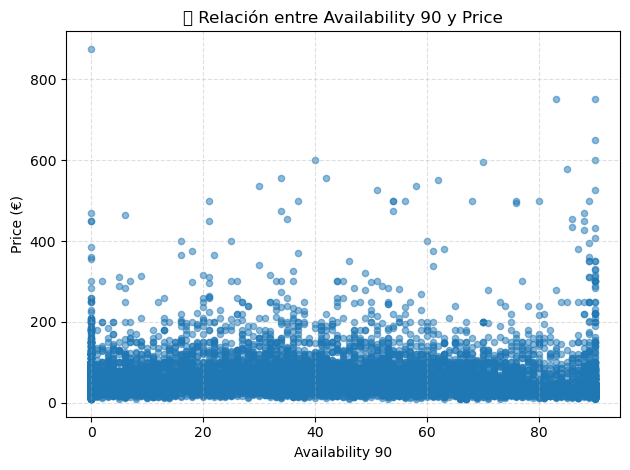

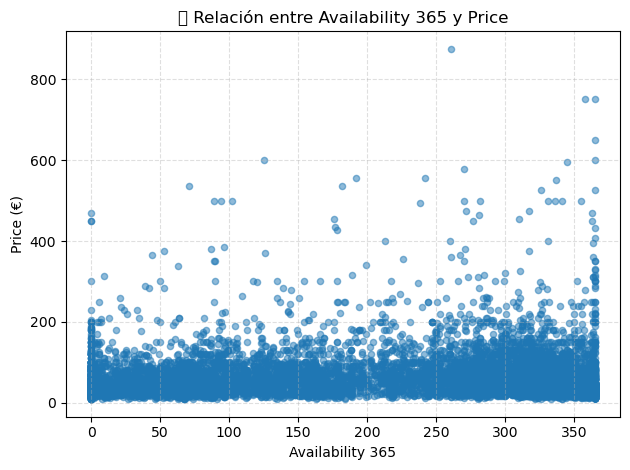

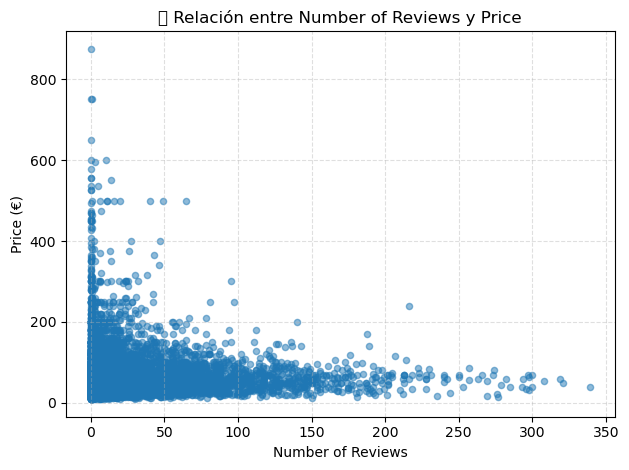

In [60]:
import matplotlib.pyplot as plt

# Lista de variables numéricas predictoras (excluimos 'ID' y 'Price')
vars_predictoras = [
    'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
    'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
    'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365',
    'Number of Reviews'
]

# Gráficos scatter por cada variable frente a price
for col in vars_predictoras:
    bronze_data.plot(kind='scatter', x=col, y='Price', alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Price (€)')
    plt.title(f'📈 Relación entre {col} y Price')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


In [ ]:
#Exploracion inicial , solo vemos el training set OK
''' house_data.describe() '''
#Tipos de datos OK
''' house_data.dtypes '''
#revision de valores nulos  OK
''' house_data.isnull().any() '''
#transformar de los null con fillna OK
''' house_data['bedrooms'].fillna(house_data['bedrooms'].mode()[0], inplace=True)
house_data.isnull().any() ''' 
#Evaluar los datos por logica del problema o negocio  NO
''' Podemos ordenar un dataframe con esta sintaxis:
sorted_df = house_data.sort_values(by='date')
sorted_df['date'].head(10) '''
#Codificacion de variables categoricas, ojo con las variables que son binarias. NO SE HIZO TODAVIA
"""
categorical = ['cat1', 'cat2', 'cat3']

mean_map = {}
for c in categorical:
    mean = data.groupby(c)['target'].mean()
    data[c] = data[c].map(mean)    
    mean_map[c] = mean

# Si hubiera test, luego se haría:
#for c in categorical:
#    data_test[c] = data_test[c].map(mean_map[c])

data.head()
"""
#descartar algunas variables del dataset  OK
''' house_data = house_data.drop(['id','date'], axis=1)
house_data.head(5).T '''
#otras transformaciones como pasar a metros cuadrados NO HIZO FALTA 
''' feetFeatures = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']

def sqft_to_m2(superficie):
    return superficie * 0.3048 * 0.3048

house_data[feetFeatures] = house_data[feetFeatures].apply(sqft_to_m2)

# Alternativa usando una función lambda
# house_data[feetFeatures] = house_data[feetFeatures].apply(lambda x: x * 0.3048 * 0.3048)

# renombramos '''

#analizar las variables individualmente , los outliners lo hacemos con una representacion bloxplot 
#Hacemos visualizacion de las variables   
''' plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
house_data['bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
plt.ylim(0, 15)
plt.xlabel('bedrooms')º 

+   

plt.subplot(1,3,2)
house_data['sqm_living'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.yscale("log")
plt.xlabel('sqm_living')

plt.subplot(1,3,3)
house_data['yr_built'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('yr_built')

plt.show()''' 


#analisis exploratorio conjunto de variables interesantes , estudiamos si hay outliners 
''' 
house_data.plot(kind = 'scatter',x='bedrooms',y = 'price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

house_data.plot(kind = 'scatter',x='sqm_living',y = 'price')
plt.xlabel('sqm_living ($m^2$)')
plt.ylabel('price ($)')
plt.show()

house_data.boxplot(by='waterfront',column = 'price')
plt.show() ''' 





In [ ]:
#Eliminamos los outliners localizados en el boxplot
''' house_data_no_outliers_bedrooms = house_data[house_data['bedrooms'] <= 8]

house_data_no_outliers_bedrooms.plot(kind = 'scatter',x='bedrooms',y = 'price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show() '''

#evaluacion de los datos eliminados 
print(
    f'Original: {house_data.shape[0]} // '
    f'Modificado: {house_data_no_outliers_bedrooms.shape[0]}\nDiferencia: {house_data.shape[0] - house_data_no_outliers_bedrooms.shape[0]}'
)
print(f'Variación: {((house_data.shape[0] - house_data_no_outliers_bedrooms.shape[0])/house_data.shape[0])*100:2f}%')

SELECCION & GENERACION DE NUEVAS VARIABLES 
Analizmos indivualmente las variables 
En el caso de regresion lineal , realizaremos un analisis de correlacion .
Hacemos una valoracion individual y otra conjunta con la correlacion 
Debe de hacerse dentro del analisis de CrosValidationTest( ESTO ES ASI SI VAMOS A UTILIZAR CV PARA OPTIMIZAR EL PROPIO MODELO ????)

In [ ]:
# GENERACION DE VARIABLES,se hacen antes del analisis de Ftest o correlacion para evaluar realmente si aportan valor predictivo 
''' house_data['years']            = 2015 - house_data['yr_built']
house_data['bedrooms_squared'] = house_data['bedrooms'].apply(lambda x: x**2)
house_data['bed_bath_rooms']   = house_data['bedrooms']*house_data['bathrooms'] ''' 


#Analisis de correlacion 

''' import seaborn as sns

# Compute the correlation matrix
corr = np.abs(house_data.drop(['price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show() '''

#dataviz de la correlacion tipo scatterplot

pd.plotting.scatter_matrix(house_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

#No tengo muy claro el hacer el Ftest y el mutual informacion score si despues vemos la importancia con randon forest.Es positivo hacerlo igualmente 
#Hacemos Ftest y mutual information score. Comprobar que siempre sea con train 

''' # convertimos el DataFrame al formato necesario para scikit-learn
data = house_data.values 

y = data[:,0:1]     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto

feature_names = house_data.columns[1:]

# estudiamos los dos métodos de filtrado
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# visualización
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show() '''





PREPARAMOS LOS DATOS PARA EL MODELO 

In [ ]:
PREPARARLOS DATOS PARA EL MODELO
from sklearn import preprocessing

# Dataset de train67
data_train = house_data.values
y_train = data_train[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data_train[:,1:]      # nos quedamos con el resto

APLICAR LOS CAMBIOS A TEST 

In [ ]:
#APLICAMOS LAS TRASNFORMACIONES Y CAMBIOS A TEST PERO SIN VERLO , ENTRE ELLAS EL ESCALADO APLICADO EN TRAIN OJO 

ANALISIS DE VARIABLES CON RANDON FOREST 

importancia de las variables 

In [ ]:
#arbol individual para ver la importancia de las variables
''' importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show() ''' 

#revision con randon forest
''' 
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show() ''' 

REGULARIZACION
se hace en el momento de aplicar el model o
Si vamos por la via de regresion lineal empleamos Rigde y Lasso , sino empleamos penalizacion con C en clasificacion 
Empleamos Ridge o Lasso para penalizar con los alphas y asi minimizar el peso de las variables o eliminar incluso algunas variables, compensa por tanto el overfitting.Podemos:
-Emplear Ridge para emplorar con una horquilla de alphas.Evaluar los pesos 
-Emplear Lasso para que me de el alpha prefecto, grafica los alphas para tener la mejor penalizacion 

In [ ]:
# RIDGE queremos ver los pesos y analizar como son de grandes con un alpha muy pequeño, 
# Ojo con el codigo esta preparado para comparar train y test
# Emplear un alpha que este alrededor de 1e-1 y ver como son de pequeños 
#1 
''' from sklearn.linear_model import Ridge

#model
alpha = 1e-14
ridge = Ridge(alpha = alpha).fit(X_train,y_train)
w = ridge.coef_
norm_w2 = np.dot(w,w.T)
    
# predicción
y_hat = ridge.predict(X_test)

# error
error_test = np.mean(np.power(y - y_hat,2)) 

plt.plot(x,g_x,'r',label='$y$')
plt.plot(x_i,y_i,'b.',label='$y_i$')
plt.plot(x,y_hat,'g',label='$\hat{y}$')
plt.title(f'Grado: {degree}, MSE:{error_test:.2f}\nalpha: {alpha:g}, $||w||_2^2$ = {norm_w2:.2g}')
plt.legend()
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.show()

coef_names = ['w' + str(i) + ': ' for i in range(1,degree+1)]

for f,wi in zip(coef_names,w):
    print(f,wi)'''
#2
''' from sklearn.model_selection import GridSearchCV

# Por convención, GridSearchCV siempre intenta MAXIMIZAR los resultados, por lo que
# funciones de coste, como MSE, tienen que ir negadas: https://github.com/scikit-learn/scikit-learn/issues/2439
# Por eso aparece neg_mean_squared_error y por eso hay luego un -1 multiplicando

alpha_vector = np.logspace(-15,1,25)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.ylim((0, 5))
plt.show()
'''




In [ ]:
#Lasso 

''' alpha_vector = np.logspace(-10,1,25)
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.ylim((0, 1))
plt.show() '''

MODELO ML